In [3]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import pyproj
from tqdm import tqdm
import numpy as np

In [4]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
# check python version and all packages version
def check_python_version():
    import sys
    print("Python version")
    print (sys.version)
    print("Pandas version")
    print(pd.__version__)
    print("Geopandas version")
    print(gpd.__version__)
    print("Xarray version")
    print(xr.__version__)
    print("Pyproj version")
    print(pyproj.__version__)

check_python_version()

Python version
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Pandas version
2.2.2
Geopandas version
0.14.2
Xarray version
2023.6.0
Pyproj version
3.6.1


In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
# Force garbage collection
import gc
gc.collect()

32

In [8]:
all_features = pd.read_parquet('../Clean_Data/Weather_Data_w_Veg_Filter_FOD_FPA_Fire_12KM_Merged_Cleaned_Completed_2001_2020.parquet')

In [9]:
all_features.shape

(126317000, 22)

In [10]:
all_features.dtypes

lon                                                 float64
lat                                                 float64
day                                          datetime64[ns]
dead_fuel_moisture_1000hr                           float32
dead_fuel_moisture_100hr                            float32
pdsi_pre_interpolated                               float32
pdsi_class                                          float32
max_air_temperature                                 float64
max_relative_humidity                               float32
max_wind_speed                                      float32
min_air_temperature                                 float64
min_relative_humidity                               float32
precipitation_amount                                float32
specific_humidity                                   float32
surface_downwelling_shortwave_flux_in_air           float32
wind_from_direction                                 float32
wind_speed                              

In [11]:
all_features['wind_direction_category'].value_counts()

wind_direction_category
NW    27893621
SW    22571701
W     20746581
S     17252834
N     12845954
SE    10456151
NE     8002943
E      6547215
Name: count, dtype: int64

In [12]:
# check the range of wind_from_direction when wind_direction_category is NW
all_features.loc[all_features['wind_direction_category'] == 'NW', 'wind_from_direction'].min()
# 293, confirmed changed.

293.0

In [13]:
# check missing values
all_features.isnull().sum()

lon                                          0
lat                                          0
day                                          0
dead_fuel_moisture_1000hr                    0
dead_fuel_moisture_100hr                     0
pdsi_pre_interpolated                        0
pdsi_class                                   0
max_air_temperature                          0
max_relative_humidity                        0
max_wind_speed                               0
min_air_temperature                          0
min_relative_humidity                        0
precipitation_amount                         0
specific_humidity                            0
surface_downwelling_shortwave_flux_in_air    0
wind_from_direction                          0
wind_speed                                   0
wind_direction_category                      0
SWE                                          0
Band1                                        0
LAI                                          0
pdsi         

<Axes: >

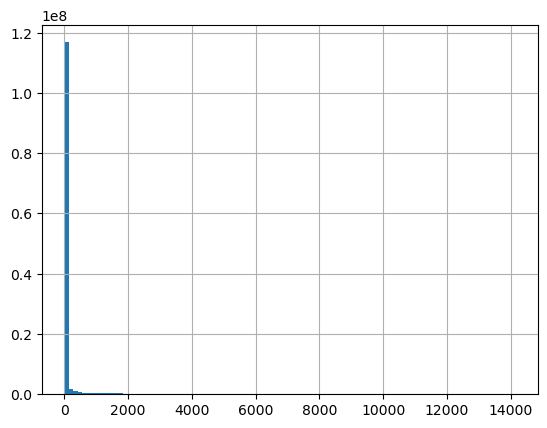

In [16]:
# plot the distribution of Band1
all_features['Band1'].hist(bins=100)

In [40]:
# calculate the quantiles of Band1
all_features['Band1'].quantile([0.32, 0.5, 0.75, 0.921, 0.95, 0.99])

0.320       0.000000
0.500       0.192883
0.750       4.491594
0.921     117.498276
0.950     499.044342
0.990    2864.946533
Name: Band1, dtype: float64

In [17]:
# get log transform of Band1
all_features['population_density_log'] = np.log(all_features['Band1'] + 1)

<Axes: >

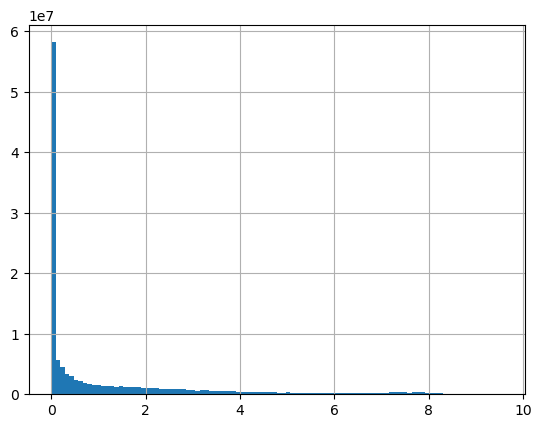

In [18]:
all_features['population_density_log'].hist(bins=100)

In [19]:
all_features['population_density_log'].quantile([0.01, 0.25, 0.4, 0.5, 0.6, 0.7,  0.75, 0.95, 0.99,1])

0.01    0.000000
0.25    0.000000
0.40    0.031747
0.50    0.176373
0.60    0.522015
0.70    1.224087
0.75    1.703219
0.95    6.214697
0.99    7.960654
1.00    9.557281
Name: population_density_log, dtype: float64

In [20]:
# write it back to parquet file
output_file = f'../Clean_Data/Weather_Data_w_Veg_Filter_FOD_FPA_Fire_12KM_Merged_Cleaned_Completed_LogDensity_2001_2020.parquet'
all_features.to_parquet(output_file)